In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [182]:
# Load the data
iris  = pd.read_csv('C:/Users/Admin/Downloads/ENCRYPTIX/IRIS FLOWER PREDICTION/IRIS.csv')

In [183]:
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [184]:
iris.tail(6)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [185]:
iris_sampling = iris.sample(10)
iris_sampling.head()

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
44,5.1,3.8,1.9,0.4,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
117,7.7,3.8,6.7,2.2,Iris-virginica


In [186]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [187]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [188]:
iris.shape

(150, 5)

In [189]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [190]:
iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [191]:
type(iris)

pandas.core.frame.DataFrame

In [192]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [193]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [194]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [195]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [196]:
act_cols = iris.columns
act_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [197]:
new_cols = ['SL','SW','PL','PW','Flowers']
iris.columns = new_cols
iris.head(6)

,SL,SW,PL,PW,Flowers
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [198]:
type(iris["SL"])

pandas.core.series.Series

In [199]:
type(iris["SW"])

pandas.core.series.Series

In [200]:
type(iris["PL"])

pandas.core.series.Series

In [201]:
type(iris["PW"])

pandas.core.series.Series

In [202]:
type(iris["Flowers"])

pandas.core.series.Series

In [203]:
iris.sort_values('Flowers',ascending = False)[1:6]

,SL,SW,PL,PW,Flowers
111,6.4,2.7,5.3,1.9,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica


In [204]:
iris.sort_index(ascending = False)[:6]

,SL,SW,PL,PW,Flowers
149,5.9,3.0,5.1,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


In [205]:
iris[134:140]

,SL,SW,PL,PW,Flowers
134,6.1,2.6,5.6,1.4,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


In [206]:
# df.iocl[135:140][["SL","PL", PW"]]
iris.iloc[134:140 , 1:4]

,SW,PL,PW
134,2.6,5.6,1.4
135,3.0,6.1,2.3
136,3.4,5.6,2.4
137,3.1,5.5,1.8
138,3.0,4.8,1.8
139,3.1,5.4,2.1


In [207]:
iris.values[20:25]

array([[5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa']], dtype=object)

Create a DataFrame from iris bunch data type dataset available with sci-kit learn

In [208]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_df['target'] = iris.target

In [209]:
iris_df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


Visualizations

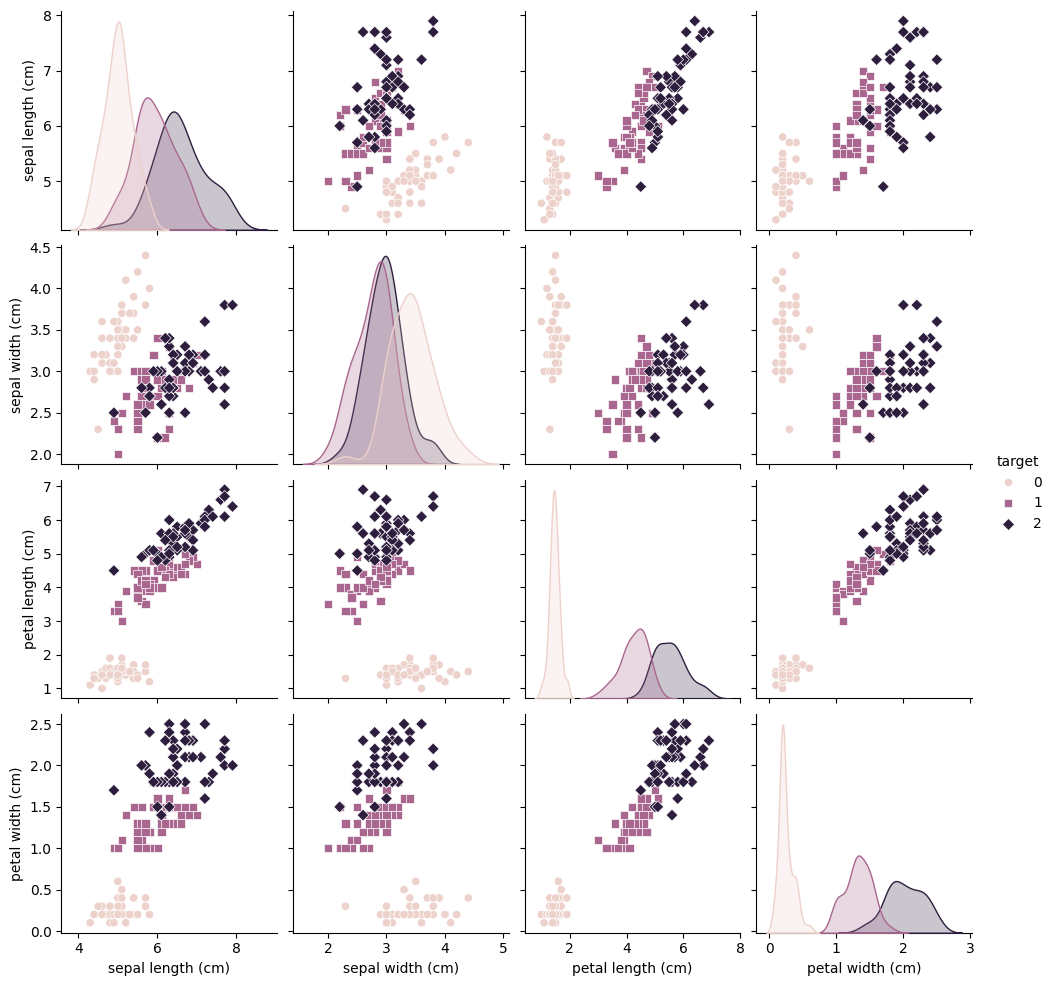

In [210]:
# Pair Plot
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()

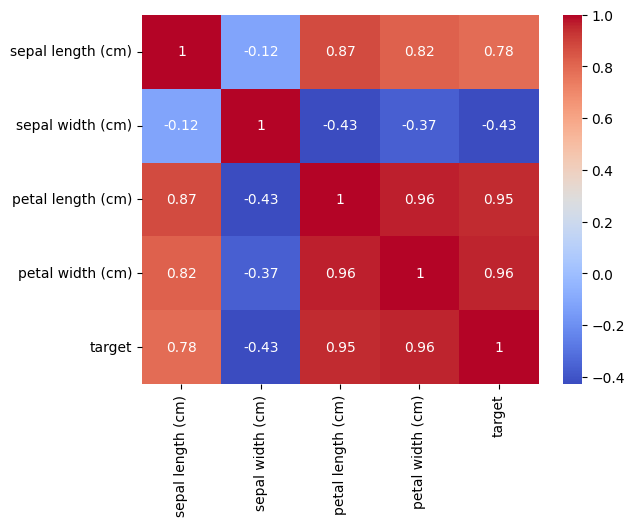

In [211]:
# Correlation Matrix
corr_matrix = iris_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

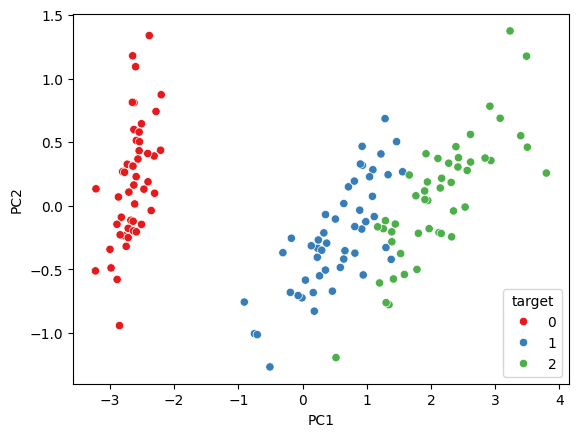

In [212]:
# Scatter Plot of PCA Result
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1') # type: ignore
plt.show()

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [214]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [215]:
y_pred = model.predict(x_test)
y_pred

array([2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 2], dtype=int64)

In [216]:
y_test

array([2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 2], dtype=int64)

In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [218]:
test_errors = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)


    y_pred_test = model.predict(x_test)
    error = 1- accuracy_score(y_test , y_pred_test)
    test_errors.append(error)

test_errors

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [219]:
# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = iris.target

In [220]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)


In [221]:
# Train SVM Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

